In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import tree


In [4]:
df=pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

/tmp/ipykernel_15383/3749504314.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


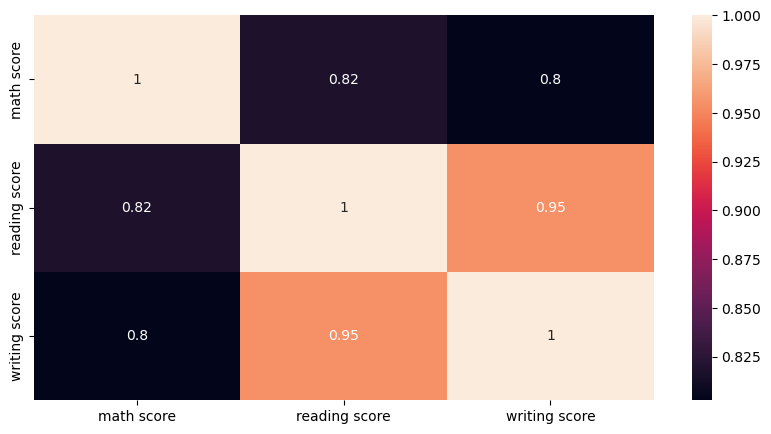

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
df["percentage"]=(df['math score']+df['writing score']+df['reading score'])/3

for i in range(len(df)):
    df['percentage']=np.ceil(df.percentage)

In [11]:
df[['lunch','math score','writing score','reading score']].groupby(['lunch']).agg('median')

,math score,writing score,reading score
lunch,,,
free/reduced,60.0,64.0,65.0
standard,69.0,72.0,72.0


In [12]:
df[['test preparation course','math score','writing score','reading score']].groupby(['test preparation course']).agg('median')

,math score,writing score,reading score
test preparation course,,,
completed,69.0,76.0,75.0
none,64.0,65.0,67.0


In [13]:
df[['parental level of education','math score','writing score','reading score']].groupby(['parental level of education']).agg('median')

,math score,writing score,reading score
parental level of education,,,
associate's degree,67.0,70.5,72.5
bachelor's degree,68.0,74.0,73.0
high school,63.0,64.0,66.0
master's degree,73.0,75.0,76.0
some college,67.5,70.0,70.5
some high school,65.0,66.0,67.0


In [14]:
df[['gender','math score','writing score','reading score']].groupby(['gender']).agg('median')

,math score,writing score,reading score
gender,,,
female,65.0,74.0,73.0
male,69.0,64.0,66.0


In [15]:
df[['race/ethnicity','math score','writing score','reading score']].groupby(['race/ethnicity']).agg('median')

,math score,writing score,reading score
race/ethnicity,,,
group A,61.0,62.0,64.0
group B,63.0,67.0,67.0
group C,65.0,68.0,71.0
group D,69.0,72.0,71.0
group E,74.5,72.0,74.0


<Axes: >

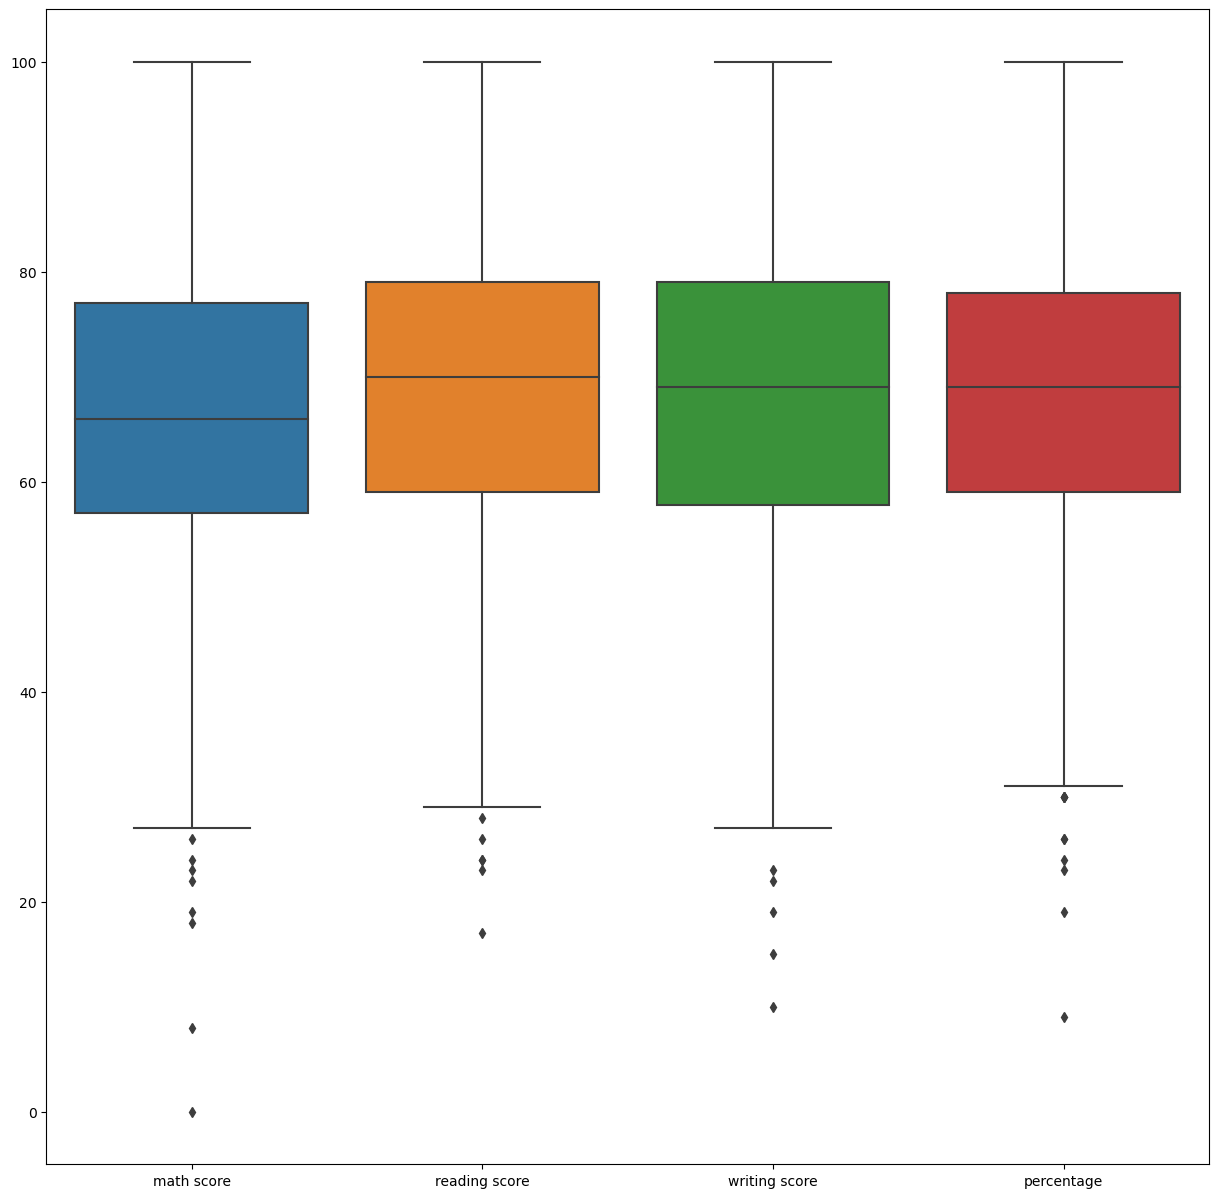

In [16]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df)

In [17]:
Le=LabelEncoder()

In [18]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,83.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,50.0
4,male,group C,some college,standard,none,76,78,75,77.0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.0
996,male,group C,high school,free/reduced,none,62,55,55,58.0
997,female,group C,high school,free/reduced,completed,59,71,65,65.0
998,female,group D,some college,standard,completed,68,78,77,75.0


In [19]:
df['gender']=df['gender'].replace(['male','female'],[1,0])
df['race/ethnicity']=df['race/ethnicity'].replace(['group A','group B','group C','group D','group E'],[0,1,2,3,4])
df['lunch']=df['lunch'].replace(['standard','free/reduced'],[1,0])
df['test preparation course']=df['test preparation course'].replace(['completed','none'],[1,0])
df['parental level of education']=df['parental level of education'].replace(['high school','some high school','some college',"bachelor's degree","master's degree","associate's degree"],[0,1,2,3,4,5])

In [20]:
Y=df['percentage']
X=df.drop('percentage',axis=1)

In [21]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2)

In [22]:
dt=tree.DecisionTreeRegressor()

In [23]:
dt.fit(train_x,train_y)

DecisionTreeRegressor()

In [24]:
dt_preds=dt.predict(test_x)

In [25]:
dt_preds

array([88., 71., 78., 46., 69., 78., 32., 68., 72., 62., 51., 70., 60.,
       88., 77., 69., 66., 73., 72., 80., 59., 65., 52., 68., 61., 69.,
       84., 64., 64., 84., 61., 97., 72., 78., 59., 75., 83., 77., 83.,
       52., 78., 79., 62., 68., 72., 56., 59., 74., 49., 53., 61., 69.,
       71., 61., 66., 61., 61., 49., 52., 65., 71., 78., 84., 71., 68.,
       58., 49., 73., 68., 57., 66., 79., 46., 64., 61., 69., 87., 65.,
       68., 92., 78., 79., 75., 68., 61., 78., 73., 54., 90., 51., 81.,
       83., 83., 88., 52., 71., 63., 94., 41., 89., 78., 56., 77., 87.,
       56., 74., 76., 54., 60., 56., 72., 50., 90., 70., 58., 49., 68.,
       93., 76., 93., 51., 65., 64., 75., 70., 68., 72., 73., 56., 52.,
       79., 39., 72., 89., 51., 49., 49., 59., 68., 75., 60., 56., 79.,
       77., 76., 70., 97., 65., 77., 55., 73., 72., 75., 65., 68., 70.,
       69., 61., 77., 72., 65., 35., 78., 79., 76., 68., 68., 65., 52.,
       78., 31., 77., 91., 65., 38., 71., 89., 59., 74., 73., 71

In [26]:
from sklearn.metrics import r2_score
r2_score(test_y,dt_preds)

0.9886393737932849

In [27]:
lr=LinearRegression()

In [28]:
lr.fit(train_x,train_y)

LinearRegression()

In [29]:
lr_preds=lr.predict(test_x)

In [30]:
r2_score(test_y,lr_preds)

0.9995967613061213

In [31]:
import pickle


In [32]:
pickle.dump(lr,open('pipe.pkl','wb'))